In [4]:
#Importing packages
#Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report

In [5]:
#Import packages

#Rdkit
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors
#Scipy
from scipy import stats 
from scipy.stats import uniform,ranksums 

#Pandas
import pandas as pd
from pandas import DataFrame

#Others
from sklearn import preprocessing
import joblib #jbolib模块
import random
import numpy as np
import os
import math
import warnings

In [7]:
#Set the Work Path
warnings.filterwarnings ('ignore')
os.chdir("./")

In [8]:
#Setting the KFold
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

In [9]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [12]:
#Read the data
Raw_data= pd.read_csv("./Original data/Smiles_data.csv",index_col=0)
Raw_data

,Hydrogel-forming ability,Chemdraw_smiles,Canonical_smiles
ID,,,
Ma_2019_A,1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
Ma_2019_U,1,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...
Ma_2019_C,1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1
Ma_2019_G,1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)...
Ma_2019_dA,1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,Nc1ncnc2c1ncn2[C@H]1C[C@H](O)[C@@H](CO)O1
...,...,...,...
Tang_2019_ArabinoC,0,O=C1N=C(C=CN1[C@@H]2O[C@@H]([C@H]([C@@H]2O)O)CO)N,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@@H]2O)c(=O)n1
Tang_2019_DideoxyC,0,O=C1N=C(N)C=CN1[C@@H]2O[C@H](CO)CC2,Nc1ccn([C@H]2CC[C@@H](CO)O2)c(=O)n1
Peters_2014_3,0,O=C1C2=C(N=CN1)N([C@H]3[C@H](O)[C@H](O)[C@@H](...,O=c1[nH]cnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C...


,Hydrogel-forming ability,Chemdraw_smiles,Canonical_smiles,Molecule
ID,,,,
Ma_2019_A,1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
Ma_2019_U,1,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
Ma_2019_C,1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
Ma_2019_G,1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
Ma_2019_dA,1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,Nc1ncnc2c1ncn2[C@H]1C[C@H](O)[C@@H](CO)O1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

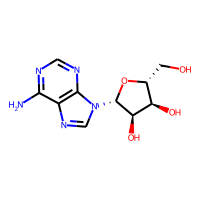
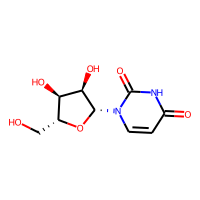
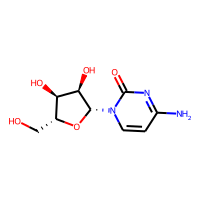
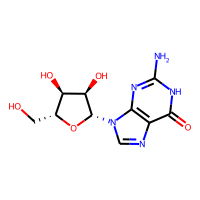
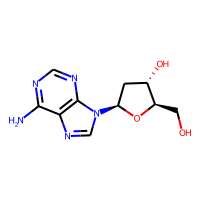

In [13]:
PandasTools.AddMoleculeColumnToFrame(Raw_data, 'Canonical_smiles','Molecule')
Raw_data.head()

In [14]:
#Morgan fingerprint
ECFP4 = []
for mol in Raw_data.Molecule:
    fp = [i for i in Chem.GetMorganFingerprintAsBitVect(mol, 2, 2048)]
    ECFP4.append(fp)
ECFP4 = np.array(ECFP4)
ECFP4.shape # (6506, 2048)

(71, 2048)

In [15]:
pd.DataFrame(ECFP4)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
67,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Morgan fingerprint
ECFP6 = []
for mol in Raw_data.Molecule:
    fp = [i for i in Chem.GetMorganFingerprintAsBitVect(mol, 3, 2048)]
    ECFP6.append(fp)
ECFP6 = np.array(ECFP6)
ECFP6.shape # (6506, 2048)

(71, 2048)

In [17]:
#RDKit fingerprint
RDK = []
for mol in Raw_data.Molecule:
    fp = [i for i in Chem.RDKFingerprint(mol, fpSize=2048)]
    RDK.append(fp)
RDK = np.array(RDK)
RDK.shape # (6506, 2048)


(71, 2048)

In [18]:
#Atom pairs
AtomPair= []
for mol in Raw_data.Molecule:
    fp = [i for i in Chem.GetHashedAtomPairFingerprintAsBitVect(mol)]

    AtomPair.append(fp)
AtomPair = np.array(AtomPair)
AtomPair.shape # (6506, 2048)

(71, 2048)

In [19]:
#Topological torsions
Torsion= []
for mol in Raw_data.Molecule:
    fp = [i for i in Chem. GetHashedTopologicalTorsionFingerprintAsBitVect(mol)]
    Torsion.append(fp)
Torsion= np.array(Torsion)
Torsion.shape # (6506, 2048)

(71, 2048)

In [20]:
y=Raw_data['Hydrogel-forming ability'].values
LR=LogisticRegression(random_state=0)
DT=DecisionTreeClassifier(random_state=0)
RF=RandomForestClassifier(random_state=0)
XGB=xgb.XGBClassifier(random_state=0)

In [21]:
def Model_collection(FP,X,y):
    Model_LR=Model_results(LR,X,y,Cv_model)
    Model_DT=Model_results(DT,X,y,Cv_model)
    Model_RF=Model_results(RF,X,y,Cv_model)
    Model_XGB=Model_results(XGB,X,y,Cv_model)
    Model_all=pd.concat([Model_LR,Model_DT,Model_RF,Model_XGB],axis=1)
    Model_all.columns = [[FP]*8,['Logistic regression','Logistic regression',
                              'Decision tree','Decision tree',
                              'Random forest','Random forest',
                              'Extreme gradient boosting','Extreme gradient boosting'], 
                     ['Mean','Se']*4]  
    Model_all.columns.names=['Fingerprint','Models','Values']
    return Model_all

In [22]:
##Morgan fingerprint (ECFP4)
Model_ECFP4=Model_collection('ECFP4',ECFP4,y)
Model_ECFP4
Model_ECFP4.to_csv("./Results/Model_ECFP4_data.csv",sep=',')

In [23]:
Model_ECFP4

Fingerprint                  ECFP4                                    \
Models         Logistic regression           Decision tree             
Values                        Mean        Se          Mean        Se   
Accuracy_test             0.656571  0.012492      0.653524  0.014581   
Accuracy_train            0.951754  0.002041      0.951754  0.002041   
F1 Score                  0.684422  0.013839      0.676016  0.014171   
Precision                 0.678903  0.013346      0.686171  0.016903   
Recall                    0.718214  0.022864      0.688571  0.021424   
Roc_auc                   0.744524  0.016651      0.670578  0.015518   

Fingerprint                                                                 
Models         Random forest           Extreme gradient boosting            
Values                  Mean        Se                      Mean        Se  
Accuracy_test       0.636286  0.014217                  0.610952  0.013690  
Accuracy_train      0.951754  0.002041                  0.922907  0.002755  
F1 Score            0.668915  0.014269                  0.639513  0.015764  
Precision           0.654362  0.012448                  0.634024  0.012398  
Recall              0.706429  0.023502                  0.670000  0.024155  
Roc_auc             0.719384  0.016194                  0.674945  0.015151

In [24]:
##Morgan fingerprint (ECFP6)
Model_ECFP6=Model_collection('ECFP6',ECFP6,y)
Model_ECFP6
Model_ECFP6.to_csv("./Results/Model_ECFP6_data.csv",sep=',')

In [25]:
Model_AtomPair=Model_collection('AtomPair',AtomPair,y)
Model_AtomPair
Model_AtomPair.to_csv("./Results/Model_AtomPair_data.csv",sep=',')

In [26]:
Model_Torsion=Model_collection('Torsion',Torsion,y)
Model_Torsion
Model_Torsion.to_csv("./Results/Model_Torsion_data.csv",sep=',')